In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load the data
df = pd.read_csv(r'C:\Users\HP\Desktop\travel_agencies_reviews_ratings.csv')

# Display basic information about the data
df.head(10)

,Agency id,Agency name,Location,Service type,User id,Customer name,Review date,Rating,Review type,Response top north method position song husband end town analysis real run special suggest mission stage.,Response date
0,A001,Chang-Fisher,"Tammyfort, Iraq",Adventure Travel,R001,Sandra Faulkner,5/5/2023,4,Through despite cause cause believe son would ...,Line beyond its particularly tree whom local t...,3/9/2024
1,A002,"Summers, Barnett and Smith","Claytonmouth, Ecuador",Cruises,R002,Michele Brown,7/12/2024,5,Develop sound central myself before year thems...,NaN,NaN
2,A003,"Harris, Lloyd and Payne","Seanfurt, Ghana",Adventure Travel,R003,Donna Lopez,12/23/2022,3,Party prevent live bed serious theory.,NaN,NaN
3,A004,Kirby Ltd,"Masseyhaven, Falkland Islands (Malvinas)",Cruises,R004,Cynthia Lewis,1/9/2024,5,Stay information every manage political record...,Rule bring determine some forward staff beyond.,3/5/2024
4,A005,"Robinson, Montoya and Walters","North Davidborough, New Caledonia",Group Travel,R005,Barbara Davis,5/8/2024,2,Already against which continue buy decision song.,NaN,NaN
5,A006,"Johnson, Coleman and Garcia","Chadland, Oman",Custom Itineraries,R006,Jeffrey Brown,7/28/2023,1,Others record hospital employee toward like.,NaN,NaN
6,A007,"Jackson, Chambers and Levy","Port Ericaburgh, Guam",Group Travel,R007,Autumn Morse,12/29/2023,5,Actually race tonight themselves true power ho...,Night actually score from animal exactly drive...,4/18/2024
7,A008,"Howard, Arroyo and Schultz","Lake Kyle, San Marino",Cruises,R008,Matthew Smith,12/27/2022,1,Civil development large report purpose themsel...,Close ask reduce land those traditional page.,12/27/2022
8,A009,Simpson LLC,"Williamschester, Comoros",Cruises,R009,Tonya Irwin,5/11/2024,4,Would I question first degree response able.,Partner couple part cup few read consider litt...,7/13/2024
9,A010,"Roth, Newman and Wilson","West Melissa, Armenia",Cruises,R010,Michael Grant,5/11/2023,4,Travel among see red pretty Republican total p...,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                     --------------  ----- 
 0   Agency id                                                                                                  1000 non-null   object
 1   Agency name                                                                                                1000 non-null   object
 2   Location                                                                                                   1000 non-null   object
 3   Service type                                                                                               1000 non-null   object
 4   User id                                                                        

In [4]:
df.describe()

,Rating
count,1000.000000
mean,2.982000
std,1.420455
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [5]:
df.isnull().sum()

Agency id                                                                                                      0
Agency name                                                                                                    0
Location                                                                                                       0
Service type                                                                                                   0
User id                                                                                                        0
Customer name                                                                                                  0
Review date                                                                                                    0
Rating                                                                                                         0
Review type                                                                                     

In [6]:
df.columns

Index(['Agency id', 'Agency name', 'Location', 'Service type', 'User id',
       'Customer name', 'Review date', 'Rating', 'Review type',
       'Response top north method position song husband end town analysis real run special suggest mission stage.',
       'Response date'],
      dtype='object')

In [7]:
# Select relevant columns
df = df[['Agency id', 'Agency name', 'Location', 'Service type', 'User id',
       'Customer name', 'Review date', 'Rating', 'Review type']]

In [8]:
df.head(5)

,Agency id,Agency name,Location,Service type,User id,Customer name,Review date,Rating,Review type
0,A001,Chang-Fisher,"Tammyfort, Iraq",Adventure Travel,R001,Sandra Faulkner,5/5/2023,4,Through despite cause cause believe son would ...
1,A002,"Summers, Barnett and Smith","Claytonmouth, Ecuador",Cruises,R002,Michele Brown,7/12/2024,5,Develop sound central myself before year thems...
2,A003,"Harris, Lloyd and Payne","Seanfurt, Ghana",Adventure Travel,R003,Donna Lopez,12/23/2022,3,Party prevent live bed serious theory.
3,A004,Kirby Ltd,"Masseyhaven, Falkland Islands (Malvinas)",Cruises,R004,Cynthia Lewis,1/9/2024,5,Stay information every manage political record...
4,A005,"Robinson, Montoya and Walters","North Davidborough, New Caledonia",Group Travel,R005,Barbara Davis,5/8/2024,2,Already against which continue buy decision song.


In [9]:
df.tail()

,Agency id,Agency name,Location,Service type,User id,Customer name,Review date,Rating,Review type
995,A996,Sweeney-Lewis,"Longshire, Jordan",Custom Itineraries,R996,William Bailey,1/29/2023,4,Each suggest former important later debate pro...
996,A997,Ponce LLC,"New Rachel, Mali",Adventure Travel,R997,Brandy Hernandez,2/10/2024,1,Game worry hear site especially least.
997,A998,Johnson LLC,"Matthewbury, Belgium",Group Travel,R998,Max Graves,11/6/2023,2,Character street politics water term inside le...
998,A999,"Lane, Herrera and Middleton","North Davidville, Tuvalu",Cruises,R999,Pamela Powers,6/15/2023,5,Management member hospital who produce build.
999,A1000,French-Williams,"Laurenhaven, Montserrat",Group Travel,R1000,Mark Silva,10/16/2022,3,Gun beautiful Mrs fish others future country.


In [10]:
df.shape

(1000, 9)

In [11]:
# Sample the data
df = df.iloc[:10000,:]

<AxesSubplot:>

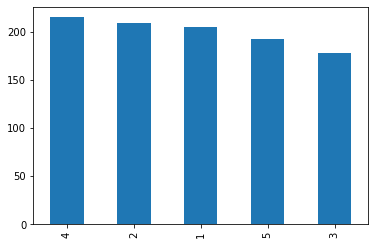

In [12]:
# Plot the distribution of Rating
df['Rating'].value_counts().plot(kind='bar')

In [13]:
# Display the first review rating
df['Rating'][1]

5

In [14]:
print(df.head())

  Agency id                    Agency name  \
0      A001                   Chang-Fisher   
1      A002     Summers, Barnett and Smith   
2      A003        Harris, Lloyd and Payne   
3      A004                      Kirby Ltd   
4      A005  Robinson, Montoya and Walters   

                                   Location      Service type User id  \
0                           Tammyfort, Iraq  Adventure Travel    R001   
1                     Claytonmouth, Ecuador           Cruises    R002   
2                           Seanfurt, Ghana  Adventure Travel    R003   
3  Masseyhaven, Falkland Islands (Malvinas)           Cruises    R004   
4         North Davidborough, New Caledonia      Group Travel    R005   

     Customer name Review date  Rating  \
0  Sandra Faulkner    5/5/2023       4   
1    Michele Brown   7/12/2024       5   
2      Donna Lopez  12/23/2022       3   
3    Cynthia Lewis    1/9/2024       5   
4    Barbara Davis    5/8/2024       2   

                               

In [15]:
print("\nFirst 5 Rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


First 5 Rows:
  Agency id                    Agency name  \
0      A001                   Chang-Fisher   
1      A002     Summers, Barnett and Smith   
2      A003        Harris, Lloyd and Payne   
3      A004                      Kirby Ltd   
4      A005  Robinson, Montoya and Walters   

                                   Location      Service type User id  \
0                           Tammyfort, Iraq  Adventure Travel    R001   
1                     Claytonmouth, Ecuador           Cruises    R002   
2                           Seanfurt, Ghana  Adventure Travel    R003   
3  Masseyhaven, Falkland Islands (Malvinas)           Cruises    R004   
4         North Davidborough, New Caledonia      Group Travel    R005   

     Customer name Review date  Rating  \
0  Sandra Faulkner    5/5/2023       4   
1    Michele Brown   7/12/2024       5   
2      Donna Lopez  12/23/2022       3   
3    Cynthia Lewis    1/9/2024       5   
4    Barbara Davis    5/8/2024       2   

                

In [16]:
#  show First five records 
df.head()

,Agency id,Agency name,Location,Service type,User id,Customer name,Review date,Rating,Review type
0,A001,Chang-Fisher,"Tammyfort, Iraq",Adventure Travel,R001,Sandra Faulkner,5/5/2023,4,Through despite cause cause believe son would ...
1,A002,"Summers, Barnett and Smith","Claytonmouth, Ecuador",Cruises,R002,Michele Brown,7/12/2024,5,Develop sound central myself before year thems...
2,A003,"Harris, Lloyd and Payne","Seanfurt, Ghana",Adventure Travel,R003,Donna Lopez,12/23/2022,3,Party prevent live bed serious theory.
3,A004,Kirby Ltd,"Masseyhaven, Falkland Islands (Malvinas)",Cruises,R004,Cynthia Lewis,1/9/2024,5,Stay information every manage political record...
4,A005,"Robinson, Montoya and Walters","North Davidborough, New Caledonia",Group Travel,R005,Barbara Davis,5/8/2024,2,Already against which continue buy decision song.


In [17]:
# Define features (X) and target (Y)
X = df[['User id']]  # Adjust based on relevant features
Y = df['Rating']  # Target variable

In [18]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [19]:
# Verify the shapes of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (700, 1)
X_test shape: (300, 1)
Y_train shape: (700,)
Y_test shape: (300,)


<AxesSubplot:>

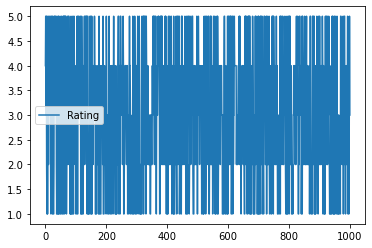

In [20]:
df.plot()

# Rating Base Recommendation System

In [21]:
#Select the required columns for recommendation
ratings_df =df[['Agency id','Agency name','User id', 'Rating']]
ratings_df

,Agency id,Agency name,User id,Rating
0,A001,Chang-Fisher,R001,4
1,A002,"Summers, Barnett and Smith",R002,5
2,A003,"Harris, Lloyd and Payne",R003,3
3,A004,Kirby Ltd,R004,5
4,A005,"Robinson, Montoya and Walters",R005,2
...,...,...,...,...
995,A996,Sweeney-Lewis,R996,4
996,A997,Ponce LLC,R997,1
997,A998,Johnson LLC,R998,2
998,A999,"Lane, Herrera and Middleton",R999,5


# Applying K-Nearest Neighbour

In [22]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the data
#df = pd.read_csv(r'C:\Users\HP\Desktop\travel_agencies_reviews_ratings.csv')

# Display basic information about the data
#df.head(10)

# Define training features and target
training = ['User id']
target = 'Rating'

# Create feature and target DataFrames
X = df[training]
y = df[target]

# Initialize LabelEncoders
label_encoders = {}
for column in training:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Make predictions
predicted = model.predict(X_test)
print("Predictions:", predicted)

Predictions: [1 1 1 5 3 1 4 3 2 5 1 5 2 3 1 3 2 4 1 1 2 4 4 2 1 1 3 2 3 1 1 1 3 3 3 3 1
 1 3 5 5 4 1 3 4 1 5 5 2 4 3 1 4 4 5 5 3 4 4 3 1 1 2 1 5 3 5 2 4 2 1 2 5 4
 1 1 1 2 4 2 1 5 1 4 1 2 1 2 2 5 5 4 2 4 4 5 1 1 5 5 5 2 1 1 4 3 4 1 1 1 4
 3 2 3 1 2 1 4 4 1 2 1 2 4 5 2 1 4 2 5 5 2 4 1 4 1 1 1 1 1 1 4 2 2 2 1 1 1
 3 5 4 3 4 2 1 1 2 1 5 1 1 2 4 4 2 5 1 1 1 2 5 4 4 4 1 4 4 1 2 1 2 1 1 2 5
 5 5 3 1 1 1 1 5 3 1 2 5 1 1 1]


C:\Users\HP\AppData\Local\Temp\ipykernel_12720\313054179.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])


In [23]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
predicted= model.predict(X_test) 
predicted

array([1, 1, 1, 5, 3, 1, 4, 3, 2, 5, 1, 5, 2, 3, 1, 3, 2, 4, 1, 1, 2, 4,
       4, 2, 1, 1, 3, 2, 3, 1, 1, 1, 3, 3, 3, 3, 1, 1, 3, 5, 5, 4, 1, 3,
       4, 1, 5, 5, 2, 4, 3, 1, 4, 4, 5, 5, 3, 4, 4, 3, 1, 1, 2, 1, 5, 3,
       5, 2, 4, 2, 1, 2, 5, 4, 1, 1, 1, 2, 4, 2, 1, 5, 1, 4, 1, 2, 1, 2,
       2, 5, 5, 4, 2, 4, 4, 5, 1, 1, 5, 5, 5, 2, 1, 1, 4, 3, 4, 1, 1, 1,
       4, 3, 2, 3, 1, 2, 1, 4, 4, 1, 2, 1, 2, 4, 5, 2, 1, 4, 2, 5, 5, 2,
       4, 1, 4, 1, 1, 1, 1, 1, 1, 4, 2, 2, 2, 1, 1, 1, 3, 5, 4, 3, 4, 2,
       1, 1, 2, 1, 5, 1, 1, 2, 4, 4, 2, 5, 1, 1, 1, 2, 5, 4, 4, 4, 1, 4,
       4, 1, 2, 1, 2, 1, 1, 2, 5, 5, 5, 3, 1, 1, 1, 1, 5, 3, 1, 2, 5, 1,
       1, 1], dtype=int64)

# Accuracy Score Of K-NN

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(predicted, y_test)

0.185

# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [27]:
predicted= model.predict(X_test) 
predicted

array([2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 4,
       4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 4, 4, 2,
       4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 2, 4, 2, 2,
       2, 2, 4, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2,
       2, 4, 4, 4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 4, 4, 4, 2, 2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4,
       4, 4, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4,
       2, 4], dtype=int64)

# Acuracy Score Of Logistic Regression

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(predicted, y_test)

0.26

# Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
predicted= clf.predict(X_test) 
predicted

array([1, 1, 4, 5, 2, 1, 4, 3, 2, 5, 1, 3, 2, 3, 2, 3, 3, 5, 4, 3, 2, 4,
       5, 5, 4, 1, 1, 4, 2, 4, 1, 5, 5, 3, 4, 3, 1, 1, 5, 5, 5, 4, 1, 4,
       1, 5, 3, 4, 5, 3, 3, 3, 4, 4, 2, 5, 5, 4, 4, 4, 1, 5, 2, 1, 2, 5,
       3, 2, 1, 5, 1, 2, 3, 1, 3, 3, 4, 2, 5, 3, 5, 2, 1, 4, 5, 2, 2, 2,
       3, 2, 5, 2, 2, 1, 5, 2, 1, 4, 5, 3, 2, 2, 1, 5, 4, 4, 4, 1, 1, 1,
       4, 5, 3, 4, 1, 1, 4, 4, 2, 5, 5, 1, 1, 1, 3, 4, 1, 4, 3, 2, 5, 2,
       4, 4, 4, 1, 5, 4, 5, 4, 5, 5, 3, 2, 2, 4, 1, 4, 3, 3, 1, 3, 3, 2,
       1, 1, 5, 1, 4, 1, 3, 3, 4, 4, 2, 5, 4, 2, 2, 1, 4, 3, 4, 2, 1, 5,
       2, 1, 5, 1, 4, 1, 1, 5, 5, 5, 4, 1, 5, 1, 1, 5, 5, 5, 1, 2, 5, 1,
       2, 5], dtype=int64)

# Accuracy Score

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(predicted, y_test)

0.165

# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
predicted= clf.predict(X_test) 
predicted

array([1, 1, 4, 5, 2, 1, 4, 3, 2, 5, 1, 3, 2, 3, 2, 3, 3, 5, 4, 3, 2, 4,
       5, 5, 4, 1, 1, 4, 2, 4, 1, 5, 5, 3, 4, 3, 1, 1, 5, 5, 5, 4, 1, 4,
       1, 5, 3, 4, 5, 3, 3, 3, 4, 4, 2, 5, 5, 4, 4, 4, 1, 5, 2, 1, 2, 5,
       3, 2, 1, 5, 1, 2, 3, 1, 3, 3, 4, 2, 5, 3, 5, 2, 1, 4, 5, 2, 2, 2,
       3, 2, 5, 2, 2, 1, 5, 2, 1, 4, 5, 3, 2, 2, 1, 5, 4, 4, 4, 1, 1, 1,
       4, 5, 3, 4, 1, 1, 4, 4, 2, 5, 5, 1, 1, 1, 3, 4, 1, 4, 3, 2, 5, 2,
       4, 4, 4, 1, 5, 4, 5, 4, 5, 5, 3, 2, 2, 4, 1, 4, 3, 3, 1, 3, 3, 2,
       1, 1, 5, 1, 4, 1, 3, 3, 4, 4, 2, 5, 4, 2, 2, 1, 4, 3, 4, 2, 1, 5,
       2, 1, 5, 1, 4, 1, 1, 5, 5, 5, 4, 1, 5, 1, 1, 5, 5, 5, 1, 2, 5, 1,
       2, 5], dtype=int64)

# Accuracy Score Of Random Forest

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(predicted, y_test)

0.165

# KMeans clustering

User-Trip Ratings:
        Trip1  Trip2  Trip3  Trip4  Trip5
User1       4      5      3      5      5
User2       2      3      3      3      5
User3       4      3      5      2      4
User4       2      4      5      1      4
User5       2      5      4      1      1
User6       3      3      2      4      4
User7       3      4      4      1      3
User8       5      3      5      1      2
User9       4      1      4      2      2
User10      1      2      5      2      4


D:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


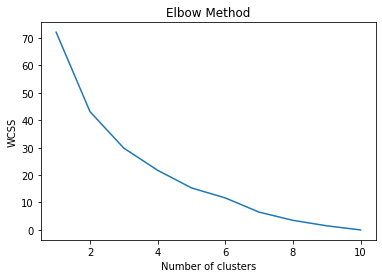

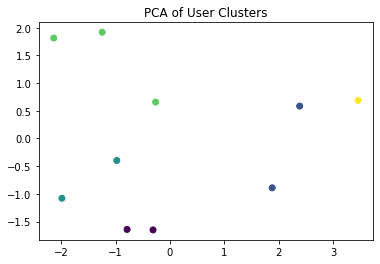

Top 3 recommendations for User1 based on cluster:
Item: Trip2, Average Rating: 5.00
Item: Trip4, Average Rating: 5.00
Item: Trip5, Average Rating: 5.00
Cluster assignments: [4 1 3 0 2 1 2 3 3 0]

User User1 is in cluster 4
Users in the same cluster:
Index(['User1'], dtype='object')
Average ratings for this cluster:
Trip1    4.0
Trip2    5.0
Trip3    3.0
Trip4    5.0
Trip5    5.0
dtype: float64


In [35]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Simulating user-item ratings with random data (10 users and 5 items)
np.random.seed(42)
user_ratings = pd.DataFrame(np.random.randint(1, 6, size=(10, 5)),
                            columns=['Trip1', 'Trip2', 'Trip3', 'Trip4', 'Trip5'],
                            index=[f'User{i}' for i in range(1, 11)])

print("User-Trip Ratings:")
print(user_ratings)

# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(user_ratings)

# Elbow method to find the optimal number of clusters
wcss = []
max_clusters = 10
for num_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(user_ratings)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, max_clusters + 1), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# Visualize the clusters using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(user_ratings)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels)
plt.title('PCA of User Clusters')
plt.show()

# Example: Get recommendations for a given user based on clustering
user_id = 'User1'  # Replace with an actual user ID from your dataset

# Get the cluster label for the given user
user_cluster_label = cluster_labels[user_ratings.index == user_id][0]

# Get all users in the same cluster as the given user
users_in_same_cluster = user_ratings.index[cluster_labels == user_cluster_label]

# Get the average ratings of the users in the same cluster
average_ratings = user_ratings.loc[users_in_same_cluster].mean()

# Sort the average ratings in descending order
sorted_ratings = average_ratings.sort_values(ascending=False)

# Example: Get top-k recommendations
k = 3
top_k_recommendations = sorted_ratings.head(k)

print(f"Top {k} recommendations for {user_id} based on cluster:")
for item_id, rating in top_k_recommendations.items():
    print(f"Item: {item_id}, Average Rating: {rating:.2f}")

# Print out cluster assignments
print("Cluster assignments:", cluster_labels)

# Inspect ratings for users in the same cluster as the given user
print(f"\nUser {user_id} is in cluster {user_cluster_label}")
print("Users in the same cluster:")
print(users_in_same_cluster)
print("Average ratings for this cluster:")
print(average_ratings)

# **Drive Code With Recommendation**

In [36]:
def recommend_Destinations(ratings_df):
    # Filter recommendations system based on minimum rating
    filtered_recommendations = ratings_df[ratings_df['Rating'] >= 3].head(5)
    return filtered_recommendations

recommendations = recommend_Destinations(ratings_df)
''
if not recommendations.empty:
    for index, row in recommendations.iterrows():
        print("User id:", row['User id'], "Rating:", row['Rating'])
else:
    print("No Recommendations Found.")

User id: R001 Rating: 4
User id: R002 Rating: 5
User id: R003 Rating: 3
User id: R004 Rating: 5
User id: R007 Rating: 5


In [37]:
def recommend_Destinations(ratings_df):
    # Filter recommendations system based on minimum rating
    filtered_recommendations = ratings_df[ratings_df['Rating'] >= 3]
    # Sort by Rating from highest to lowest
    sorted_recommendations = filtered_recommendations.sort_values(by='Rating', ascending=False).head(5)
    return sorted_recommendations

df = pd.read_csv(r'C:\Users\HP\Desktop\travel_agencies_reviews_ratings.csv')

ratings_df = pd.DataFrame(df)

recommendations = recommend_Destinations(ratings_df)

if not recommendations.empty:
    for index, row in recommendations.iterrows():
        print("User id:", row['User id'], "Rating:", row['Rating'])
else:
    print("No Recommendations Found.")

User id: R503 Rating: 5
User id: R750 Rating: 5
User id: R777 Rating: 5
User id: R240 Rating: 5
User id: R241 Rating: 5


In [38]:
ratings_df

,Agency id,Agency name,Location,Service type,User id,Customer name,Review date,Rating,Review type,Response top north method position song husband end town analysis real run special suggest mission stage.,Response date
0,A001,Chang-Fisher,"Tammyfort, Iraq",Adventure Travel,R001,Sandra Faulkner,5/5/2023,4,Through despite cause cause believe son would ...,Line beyond its particularly tree whom local t...,3/9/2024
1,A002,"Summers, Barnett and Smith","Claytonmouth, Ecuador",Cruises,R002,Michele Brown,7/12/2024,5,Develop sound central myself before year thems...,NaN,NaN
2,A003,"Harris, Lloyd and Payne","Seanfurt, Ghana",Adventure Travel,R003,Donna Lopez,12/23/2022,3,Party prevent live bed serious theory.,NaN,NaN
3,A004,Kirby Ltd,"Masseyhaven, Falkland Islands (Malvinas)",Cruises,R004,Cynthia Lewis,1/9/2024,5,Stay information every manage political record...,Rule bring determine some forward staff beyond.,3/5/2024
4,A005,"Robinson, Montoya and Walters","North Davidborough, New Caledonia",Group Travel,R005,Barbara Davis,5/8/2024,2,Already against which continue buy decision song.,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
995,A996,Sweeney-Lewis,"Longshire, Jordan",Custom Itineraries,R996,William Bailey,1/29/2023,4,Each suggest former important later debate pro...,Onto economy raise capital magazine true old c...,5/14/2024
996,A997,Ponce LLC,"New Rachel, Mali",Adventure Travel,R997,Brandy Hernandez,2/10/2024,1,Game worry hear site especially least.,NaN,NaN
997,A998,Johnson LLC,"Matthewbury, Belgium",Group Travel,R998,Max Graves,11/6/2023,2,Character street politics water term inside le...,NaN,NaN
998,A999,"Lane, Herrera and Middleton","North Davidville, Tuvalu",Cruises,R999,Pamela Powers,6/15/2023,5,Management member hospital who produce build.,Read staff second including certainly girl may...,3/26/2024


In [39]:
# Example data
data = [[0, 15], [1, -10], [2, 25], [3, -5]]

# Create a transformer object
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data)

print(scaled_data)

[[-1.34164079  0.61159284]
 [-0.4472136  -1.13581527]
 [ 0.4472136   1.31055608]
 [ 1.34164079 -0.78633365]]


In [40]:
# Convert categorical variables to numeric
label_encoder = LabelEncoder()
X = X.apply(label_encoder.fit_transform)

In [41]:
# Define features (X) and target (Y)
X = df[['User id']]  # Adjust based on relevant features
Y = df['Rating']  # Target variable

In [42]:
df['Rating']

0      4
1      5
2      3
3      5
4      2
      ..
995    4
996    1
997    2
998    5
999    3
Name: Rating, Length: 1000, dtype: int64

# Rating base using kMeans clustering 

In [43]:
from sklearn.cluster import KMeans

# Select the relevant features for clustering
features = df[['Rating']]  # replace with your actual feature names

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(features)

In [44]:
df['cluster'] = cluster_labels

# View the clustered data
print(df[['Agency id', 'User id', 'Rating', 'cluster']])  # Adjust columns as needed

    Agency id User id  Rating  cluster
0        A001    R001       4        1
1        A002    R002       5        3
2        A003    R003       3        4
3        A004    R004       5        3
4        A005    R005       2        0
..        ...     ...     ...      ...
995      A996    R996       4        1
996      A997    R997       1        2
997      A998    R998       2        0
998      A999    R999       5        3
999     A1000   R1000       3        4

[1000 rows x 4 columns]


In [45]:
#Sort the average ratings in descending order
sorting_ratings = average_ratings.sort_values(ascending=False)

In [46]:
# Convert Series to DataFrame (if necessary)
top_k_recommendations = sorting_ratings.head(k).reset_index()
top_k_recommendations.columns = ['user id', 'Rating']

# Print the top_k recommendations
print("Top", k, "recommendations for user", user_id, ":")
for index, row in top_k_recommendations.iterrows():
    print("user id:", row['user id'], "Rating:", row['Rating'])

Top 3 recommendations for user User1 :
user id: Trip2 Rating: 5.0
user id: Trip4 Rating: 5.0
user id: Trip5 Rating: 5.0


# **User Base Recommendation System**

# Collaberative Filtering

In [47]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

In [48]:
df = pd.read_csv(r'C:\Users\HP\Desktop\travel_agencies_reviews_ratings.csv')
df = df.iloc[:10000,:]
df = df[['User id', 'Agency id', 'Agency name', 'Rating']]

In [49]:
df.head(3)

,User id,Agency id,Agency name,Rating
0,R001,A001,Chang-Fisher,4
1,R002,A002,"Summers, Barnett and Smith",5
2,R003,A003,"Harris, Lloyd and Payne",3


In [50]:
import pandas as pd
import numpy as np

# Load or create user-item matrix
user_item_matrix = pd.read_csv(r'C:\Users\HP\Desktop\travel_agencies_reviews_ratings.csv', index_col=0)  # Load actual data

# Generate a random user similarity matrix
num_users = len(user_item_matrix)
user_similarity = np.random.rand(num_users, num_users)

# Assuming the target user is the first user
target_user_index = 0

# Get the similarity scores for the target user
target_user_similarity_scores = user_similarity[target_user_index]

print("User Similarity Scores for Target User:", target_user_similarity_scores)

User Similarity Scores for Target User: [2.41025466e-01 6.83263519e-01 6.09996658e-01 8.33194912e-01
 1.73364654e-01 3.91060608e-01 1.82236088e-01 7.55361410e-01
 4.25155874e-01 2.07941663e-01 5.67700328e-01 3.13132925e-02
 8.42284775e-01 4.49754133e-01 3.95150236e-01 9.26658866e-01
 7.27271996e-01 3.26540769e-01 5.70443974e-01 5.20834260e-01
 9.61172024e-01 8.44533849e-01 7.47320110e-01 5.39692132e-01
 5.86751166e-01 9.65255307e-01 6.07034248e-01 2.75999182e-01
 2.96273506e-01 1.65266939e-01 1.56364067e-02 4.23401481e-01
 3.94881518e-01 2.93488175e-01 1.40798227e-02 1.98842404e-01
 7.11341953e-01 7.90175541e-01 6.05959975e-01 9.26300879e-01
 6.51077026e-01 9.14959676e-01 8.50038578e-01 4.49450674e-01
 9.54101165e-02 3.70818252e-01 6.68841253e-01 6.65922357e-01
 5.91297788e-01 2.74721793e-01 5.61243426e-01 3.82926875e-01
 9.71712095e-01 8.48913824e-01 7.21729521e-01 2.35984920e-01
 2.56068323e-01 4.04335895e-02 7.10662890e-01 1.10890821e-01
 4.39336502e-01 2.01719202e-01 8.95763596e-01

In [51]:
# Example user similarity matrix as a numpy array
user_similarity = np.random.rand(len(user_item_matrix), len(user_item_matrix))

# Assuming the target user is the first user in the user_item_matrix
target_user_index = user_item_matrix.index[0]

# Convert the target_user_index to an integer index for the numpy array
target_user_index_int = user_item_matrix.index.get_loc(target_user_index)

# Get similarity scores for the target user
similarity_scores = user_similarity[target_user_index_int]

# Sort indices of similar users in descending order and exclude the target user itself
neighbor_indices = np.argsort(similarity_scores)[::-1][1:]

print("Target user index:", target_user_index)
print("Neighbor indices:", neighbor_indices)

Target user index: A001
Neighbor indices: [231 172 180 798 981 595 762 904 261 632 459 118 745  35 578  90 877 962
 287  26 606 996 488  94 190 847  87 490 609 681 630 549 115 226 149 925
 997 886 514 160 903 678 298 723 221 944 224  68 907 519 123 905 415  93
 352  92 510 322 225 950   3 737 503 621 568  10 361 920  14 191 471 748
 229 144 205 892 143  27 930 775 354  77 278 718 230 542 243 121 482 457
  43 600 263 397 956 138 507 251 771 400 460 294 439   8 168 734 463 587
 957 784 590 852 146 512 576 803 527 260 787 849  62 562 277 393 703 215
 922 358 342 874 162 152 547 671  46 470 114 343 429 936 933 878 761 167
 767 565 711 790 173 593 235 264 932   0 968 581 725 574 994 571 862 417
 942 236 899 662 676 117 961 500 668  72 952  56 104 832 556 909 246 431
 366 498  89 475 598 315 155 247 721  76 773 746 633 555 262 209 551 895
 169 259 238 289 808 339 594  79 796 406 708 629 646 573 692 176 418 867
 409 133 675 444 327 402 661 317 253 504  82 717 868 792  38 735 270 758
 185 780 

In [52]:
# Initialize list to store recommended items
recommended_items = []

# Iterate through neighbor indices and find recommended items
for neighbor_index in neighbor_indices:
    neighbor_ratings = user_item_matrix.iloc[neighbor_index]
    target_user_ratings = user_item_matrix.iloc[target_user_index_int]
    
    # Find items that the neighbor has rated highly but the target user has not
    recommended_indices = [
        i for i, rating in enumerate(neighbor_ratings)
        if isinstance(rating, (int, float)) and rating > 4 
        and isinstance(target_user_ratings.iloc[i], (int, float)) 
        and target_user_ratings.iloc[i] == 0
    ]
    
    # Add the recommended tour names to the list
    recommended_items.extend(user_item_matrix.columns[recommended_indices])

# Filter the user_item_matrix to include only the recommended items
recommended_df = user_item_matrix[recommended_items]

# Display only the first 10 recommended tours
recommended_df = recommended_df.head(10)

print("Recommended Tours:")
print(recommended_df)

Recommended Tours:
Empty DataFrame
Columns: []
Index: [A001, A002, A003, A004, A005, A006, A007, A008, A009, A010]


In [53]:
recommended_df.head(10)

""
Agency id
A001
A002
A003
A004
A005
A006
A007
A008
A009
